In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf'  # Windows의 경우

font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [4]:
# 데이터 불러오기 
raw_data = pd.read_excel('./DB/3_구조 생산설계 DP 현황.xlsx', sheet_name = None)

# 엑셀의 sheet 값 추출
COT_data = raw_data['P1_COT 구조생설DP']
STL_data = raw_data['P2_STL 구조생설DP']
CNT_data = raw_data['P3_CNT 구조생설DP']

# 모든 sheet 값 합쳐서 추출
data = pd.concat([COT_data, STL_data, CNT_data], ignore_index = True)

data

,No,프로젝트,D/P&BOM 코드,D/P&BOM 내역,설계기능,도면종류,협력사,직영책임부서,작업 출도계획,작업 출도실적
0,1,P1,DPBOM000000001,도장,F1,D1,NaN,D1,2014-07-13,2014-07-10
1,2,P1,DPBOM000000002,도장,F1,D1,NaN,D1,2014-07-13,2014-07-10
2,3,P1,DPBOM000000003,가공,F2,D2,D5,D3,2014-07-14,2014-07-09
3,4,P1,DPBOM000000004,족장,F3,D3,NaN,D4,2014-07-21,2014-06-30
4,5,P1,DPBOM000000005,공작,F2,D4,D5,D3,2014-07-21,2014-06-16
...,...,...,...,...,...,...,...,...,...,...
3065,1423,P3,DPBOM000002133,공작,F2,D4,NaN,D3,2014-10-09,2014-10-11
3066,1424,P3,DPBOM000002134,철의장,F2,D5,NaN,D3,2014-08-20,2014-08-20
3067,1425,P3,DPBOM000001232,도장,F1,D1,NaN,D1,2014-04-16,2014-07-21
3068,1426,P3,DPBOM000000789,가공,F4,D2,NaN,D3,2014-07-08,2014-07-06


In [5]:
# 필요없는 열 ['No', 'D/P&BOM 코드'] 삭제
df = data.drop(['No', 'D/P&BOM 코드'], axis = 1)

df

,프로젝트,D/P&BOM 내역,설계기능,도면종류,협력사,직영책임부서,작업 출도계획,작업 출도실적
0,P1,도장,F1,D1,NaN,D1,2014-07-13,2014-07-10
1,P1,도장,F1,D1,NaN,D1,2014-07-13,2014-07-10
2,P1,가공,F2,D2,D5,D3,2014-07-14,2014-07-09
3,P1,족장,F3,D3,NaN,D4,2014-07-21,2014-06-30
4,P1,공작,F2,D4,D5,D3,2014-07-21,2014-06-16
...,...,...,...,...,...,...,...,...
3065,P3,공작,F2,D4,NaN,D3,2014-10-09,2014-10-11
3066,P3,철의장,F2,D5,NaN,D3,2014-08-20,2014-08-20
3067,P3,도장,F1,D1,NaN,D1,2014-04-16,2014-07-21
3068,P3,가공,F4,D2,NaN,D3,2014-07-08,2014-07-06


In [6]:
# ['작업 출도계획', '작업 출도실적']을 날짜 형식으로 변환
df['작업 출도계획'] = pd.to_datetime(df['작업 출도계획'])
df['작업 출도실적'] = pd.to_datetime(df['작업 출도실적'])

# 계획보다 늦게 제출 됐으면 1 제대로 제출 됐으면 0의 값
df['출도계획 차질 유무'] = (df['작업 출도계획'] < df['작업 출도실적']).astype(int)
# 계획보다 늦게 제출된 날짜를 추출
df['출도계획 차질 날짜'] = (df['작업 출도실적'] - df['작업 출도계획']).dt.days

# clip(lower || upper) = 주어진 최솟값과 최댓값을 기준으로 데이터의 값을 조정해, 범위를 벗어나는 값은 해당 범위의 경계 값으로 변경해
df['출도계획 차질 날짜'] = df['출도계획 차질 날짜'].clip(lower = 0)

df

,프로젝트,D/P&BOM 내역,설계기능,도면종류,협력사,직영책임부서,작업 출도계획,작업 출도실적,출도계획 차질 유무,출도계획 차질 날짜
0,P1,도장,F1,D1,NaN,D1,2014-07-13,2014-07-10,0,0
1,P1,도장,F1,D1,NaN,D1,2014-07-13,2014-07-10,0,0
2,P1,가공,F2,D2,D5,D3,2014-07-14,2014-07-09,0,0
3,P1,족장,F3,D3,NaN,D4,2014-07-21,2014-06-30,0,0
4,P1,공작,F2,D4,D5,D3,2014-07-21,2014-06-16,0,0
...,...,...,...,...,...,...,...,...,...,...
3065,P3,공작,F2,D4,NaN,D3,2014-10-09,2014-10-11,1,2
3066,P3,철의장,F2,D5,NaN,D3,2014-08-20,2014-08-20,0,0
3067,P3,도장,F1,D1,NaN,D1,2014-04-16,2014-07-21,1,96
3068,P3,가공,F4,D2,NaN,D3,2014-07-08,2014-07-06,0,0


In [7]:
# 출도계획에 차질이 있는 데이터 추출
df_plan_broken = df[df['출도계획 차질 유무'] == 1]

df_plan_broken.head()

,프로젝트,D/P&BOM 내역,설계기능,도면종류,협력사,직영책임부서,작업 출도계획,작업 출도실적,출도계획 차질 유무,출도계획 차질 날짜
474,P1,의장,F1,D8,NaN,D1,2014-05-26,2014-05-28,1,2
500,P1,철의장,F2,D5,D5,D3,2012-11-06,2012-12-31,1,55
502,P1,철의장,F2,D5,D5,D3,2012-11-06,2012-12-31,1,55
1008,P2,도장,F1,D1,NaN,D1,2014-04-13,2014-04-15,1,2
1012,P2,철의장,F2,D5,D5,D3,2013-12-26,2013-12-31,1,5


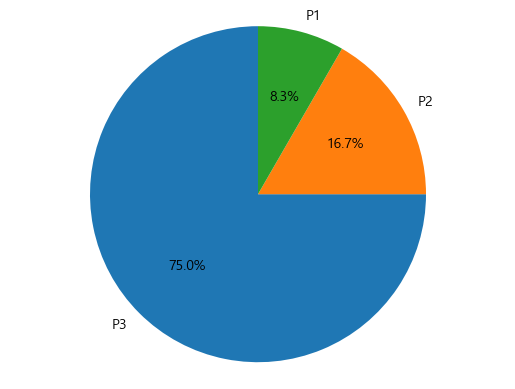

In [29]:
df_count = df_plan_broken['프로젝트'].value_counts()

plt.pie(df_count,labels = df_count.index, autopct = '%1.1f%%', startangle = 90)
plt.axis('equal')
plt.show()

In [34]:
# 프로젝트 별 설계기능 갯수
df_count = df_plan_broken.groupby('프로젝트')['설계기능'].value_counts()

df_count

프로젝트  설계기능
P1    F2       2
      F1       1
P2    F1       3
      F2       3
P3    F3      17
      F1       9
      F2       1
Name: count, dtype: int64

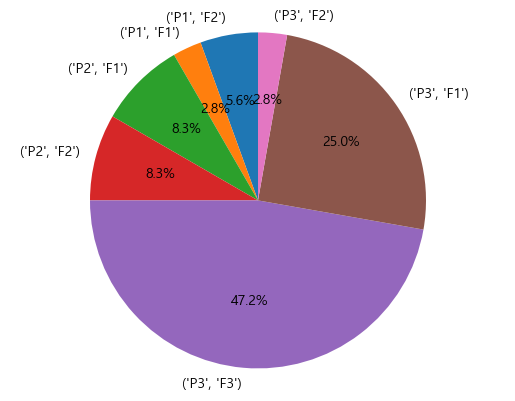

In [35]:
# 프로젝트 별 설계기능 비율
plt.pie(df_count, labels = df_count.index, autopct='%1.1f%%', startangle=90)

plt.axis('equal')

plt.show()

In [36]:
# 프로젝트, 설계기능 별 D/P 내역 갯수
df_count = df_plan_broken.groupby(['프로젝트', '설계기능'])['D/P&BOM 내역'].value_counts()

df_count

프로젝트  설계기능  D/P&BOM 내역
P1    F1    의장             1
      F2    철의장            2
P2    F1    도장             3
      F2    철의장            3
P3    F1    도장             6
            의장             3
      F2    공작             1
      F3    족장            17
Name: count, dtype: int64

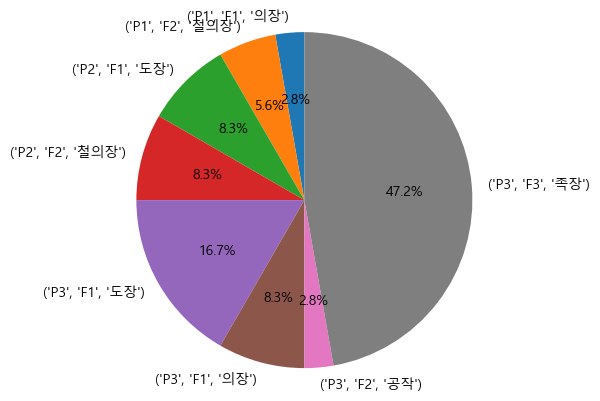

In [37]:
# 프로젝트, 설계기능 별 D/P 내역 비율
plt.pie(df_count, labels = df_count.index, autopct='%1.1f%%', startangle=90)

plt.axis('equal')

plt.show()